In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
path = "http://bit.ly/w-data"
dataset = pd.read_csv(path)

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [4]:
print(dataset.shape)

(25, 2)


In [5]:
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
dataset.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [8]:
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values

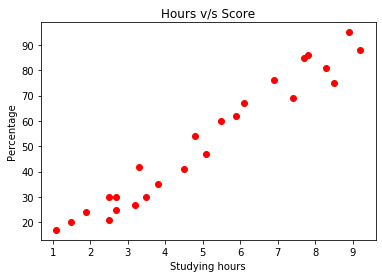

In [21]:
plt.scatter(x,y,color = 'red')
plt.title("Hours v/s Score")
plt.xlabel("Studying hours")
plt.ylabel('Percentage')
plt.show()

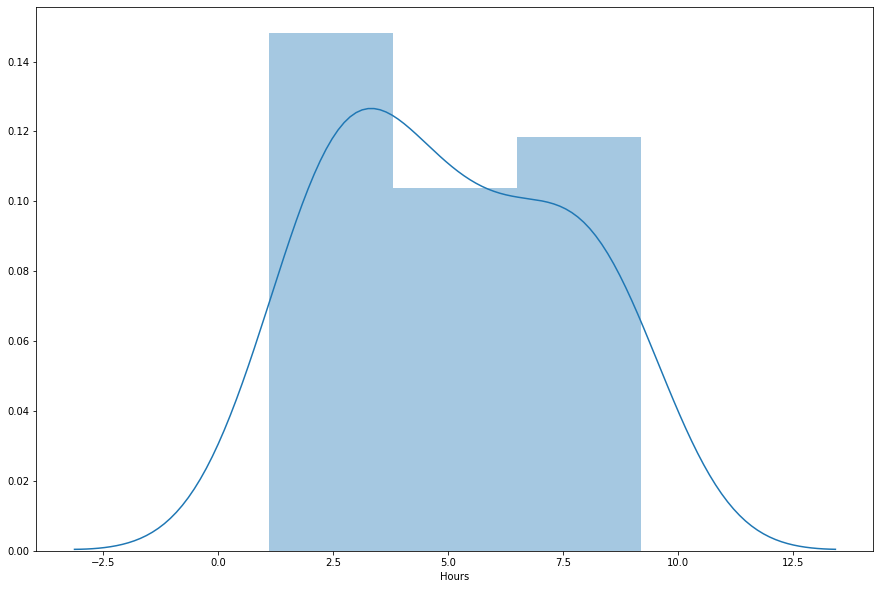

In [11]:
plt.figure(figsize=(15,10))
plt.tight_layout()
sns.distplot(dataset['Hours'])

In [13]:
X = dataset['Hours'].values.reshape(-1,1)
y = dataset['Scores'].values.reshape(-1,1)
print(X)
print(y)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]
[[21]
 [47]
 [27]
 [75]
 [30]
 [20]
 [88]
 [60]
 [81]
 [25]
 [85]
 [62]
 [41]
 [42]
 [17]
 [95]
 [30]
 [24]
 [67]
 [69]
 [30]
 [54]
 [35]
 [76]
 [86]]


In [14]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [15]:
regressor = LinearRegression()
regressor.fit(X_train,y_train)

#To retrieve the intercept and coefficient
print(regressor.intercept_)
print(regressor.coef_)

[2.01816004]
[[9.91065648]]


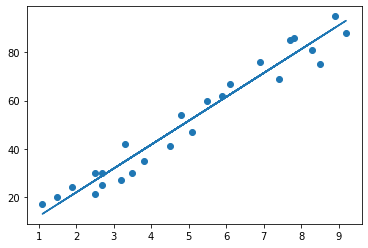

In [16]:
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()


In [17]:
print(X_test)
y_pred = regressor.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [18]:

df = pd.DataFrame({'Actual':y_test.flatten(),'Predicted':y_pred.flatten()})
df


,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [22]:
hours = [[9.25]]
one_pred = regressor.predict(hours)
print("Number of Hours {}".format(hours[0][0]))
print("Predicted Score = {}".format(one_pred[0][0]))


Number of Hours 9.25
Predicted Score = 93.69173248737538


In [20]:
from sklearn import metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_pred))


Mean Absolute Error: 4.183859899002975
